#### Task 2
Use Azure: Custom Vision API to complete a classification problem to classify Hardshell Jacket and Insulate Jacket

In [4]:
#! pip install azure

    100% |████████████████████████████████| 61kB 12.2MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 17.0MB/s ta 0:00:01
    100% |████████████████████████████████| 358kB 40.0MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 39.9MB/s ta 0:00:01
    100% |████████████████████████████████| 1.1MB 27.4MB/s ta 0:00:01
    100% |████████████████████████████████| 317kB 45.4MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 43.5MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 42.0MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 46.9MB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 43.1MB/s a 0:00:01
    100% |████████████████████████████████| 81kB 27.7MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 46.0MB/s ta 0:00:01
    100% |████████████████████████████████| 194kB 47.4MB/s ta 0:00:01
    100% |████████████████████████████████| 337kB 43.2MB/s ta 0:00:01


    100% |████████████████████████████████| 563kB 38.9MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 40.3MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 28.2MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 35.0MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 43.8MB/s ta 0:00:01
    100% |████████████████████████████████| 419kB 21.5MB/s ta 0:00:01
    100% |████████████████████████████████| 573kB 40.6MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 43.7MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 42.3MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 44.9MB/s ta 0:00:01
    100% |████████████████████████████████| 122kB 48.8MB/s ta 0:00:01
    100% |████████████████████████████████| 2.5MB 17.0MB/s ta 0:00:01
    100% |████████████████████████████████| 491kB 2.0MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 32.8MB/s ta 0:00:01
    100% |██████████████████

    100% |████████████████████████████████| 9.6MB 6.9MB/s eta 0:00:01    15% |████▉                           | 1.4MB 14.0MB/s eta 0:00:01
    100% |████████████████████████████████| 184kB 48.2MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 41.6MB/s ta 0:00:01
    100% |████████████████████████████████| 307kB 45.6MB/s ta 0:00:01
    100% |████████████████████████████████| 256kB 46.8MB/s ta 0:00:01
    100% |████████████████████████████████| 40kB 30.3MB/s ta 0:00:01
    100% |████████████████████████████████| 296kB 47.0MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 37.3MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 39.5MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 38.5MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 5.6MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 33.0MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 35.8MB/s ta 0:00:01
    100% |██████████████████

  Found existing installation: azure-graphrbac 0.53.0
    Uninstalling azure-graphrbac-0.53.0:
      Successfully uninstalled azure-graphrbac-0.53.0
  Found existing installation: azure-mgmt-authorization 0.51.1
    Uninstalling azure-mgmt-authorization-0.51.1:
      Successfully uninstalled azure-mgmt-authorization-0.51.1
  Found existing installation: azure-mgmt-storage 3.1.0
    Uninstalling azure-mgmt-storage-3.1.0:
      Successfully uninstalled azure-mgmt-storage-3.1.0


In [1]:
from PIL import Image

In [46]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateEntry

ENDPOINT = "https://southcentralus.api.cognitive.microsoft.com"

# Replace with a valid key
training_key = "112696602d41476fb71828087b0322fe"
prediction_key = "8af2c213f6214d2ba569b36069be92f7"

trainer = CustomVisionTrainingClient(training_key, endpoint=ENDPOINT)

# Create a new project
print ("Creating project...")
project = trainer.create_project("My New Project")

Creating project...


In [47]:
project.id

'b7ceaf48-728b-4a05-ad35-a23c744f4e96'

In [48]:
# Make two tags in the new project
hardshell_tag = trainer.create_tag(project.id, "hardshell_jackets")
insultate_tag = trainer.create_tag(project.id, "insulated_jackets")

tag_dict={}
tag_dict['hardshell_jackets']=hardshell_tag
tag_dict['insulated_jackets']=insultate_tag

In [49]:
print(insultate_tag)

{'additional_properties': {}, 'id': '590c1423-c094-4980-a4f6-83d0d81f9783', 'name': 'insulated_jackets', 'description': None, 'type': 'Regular', 'image_count': 0}


In [50]:
import os
import numpy as np
#from io import 

image_entry = lambda file_name, image_bytes_array, tag_id: ImageFileCreateEntry(
    name=file_name, contents=image_bytes_array, tag_ids=[tag_id])

mother_dir='gear_images'
    
    
temp_image_list=[]

for folder in ['hardshell_jackets','insulated_jackets']:
    for img in os.listdir(os.path.join(mother_dir,folder))[:20]:
        #img=Image.open()
        #print()
        with open(os.path.join(mother_dir,folder,img), "rb") as image:
            f = image.read()
            img_bytes_array = bytearray(f)
            #print(img_bytes_array)
            temp_image_list.append(ImageFileCreateEntry(name=img, contents=img_bytes_array, tag_ids=[tag_dict[folder].id]))
        

In [51]:
trainer.create_images_from_files(project.id, images=temp_image_list)

In [52]:
import time

print ("Training...")
iteration = trainer.train_project(project.id)
while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)

# The iteration is now trained. Make it the default project endpoint
trainer.update_iteration(project.id, iteration.id, is_default=True)
print ("Done!")

Training...
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Completed
Done!


True


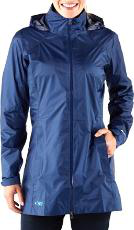

In [87]:
import pathlib

imgpath=pathlib.Path('gear_images/hardshell_jackets/101634.jpeg')
print(imgpath.exists())

Image.open(imgpath)

In [55]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient

# Now there is a trained endpoint that can be used to make a prediction

predictor = CustomVisionPredictionClient(prediction_key, endpoint=ENDPOINT)

with open(test_img, mode="rb") as test_data:
    results = predictor.predict_image(project.id, test_data)

# Display the results.
for prediction in results.predictions:
    print ("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100))

	hardshell_jackets: 99.70%
	insulated_jackets: 0.06%


In [100]:
test_set=[]
for cat in ['hardshell_jackets','insulated_jackets']:
    file_names=[]
    thepath=os.path.join('gear_images',cat)
    #print(type(thepath))
    full_list=os.listdir(thepath)
    for ind in np.random.randint(0,len(full_list),5):
        file_names.append(full_list[ind])
    for file in file_names:
        test_set.append('gear_images/{}/{}'.format(cat,file))

In [101]:
test_set

['gear_images/hardshell_jackets/112126.jpeg',
 'gear_images/hardshell_jackets/10317665x1012905_zm.jpeg',
 'gear_images/hardshell_jackets/10116634x1038116_zm.jpeg',
 'gear_images/hardshell_jackets/10237625x1068072_zm.jpeg',
 'gear_images/hardshell_jackets/10329536x1128779_zm.jpeg',
 'gear_images/insulated_jackets/10342603x1063468_zm.jpeg',
 'gear_images/insulated_jackets/866332.jpeg',
 'gear_images/insulated_jackets/10312878x1038337_zm.jpeg',
 'gear_images/insulated_jackets/10344854x1150806_zm.jpeg',
 'gear_images/insulated_jackets/10252804x1149856_zm.jpeg']

In [102]:
for img in test_set:
    
    test_img=pathlib.Path(img)
    
    if test_img.exists():
    
        with open(test_img, mode="rb") as test_data:
            results = predictor.predict_image(project.id, test_data)

        # Display the results.
            print (test_img)
            for prediction in results.predictions:
                print ("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100))
            
            print('/n')

gear_images/hardshell_jackets/112126.jpeg
	hardshell_jackets: 98.86%
	insulated_jackets: 0.16%
gear_images/hardshell_jackets/10317665x1012905_zm.jpeg
	hardshell_jackets: 100.00%
	insulated_jackets: 0.00%
gear_images/hardshell_jackets/10116634x1038116_zm.jpeg
	hardshell_jackets: 99.73%
	insulated_jackets: 0.17%
gear_images/hardshell_jackets/10237625x1068072_zm.jpeg
	hardshell_jackets: 98.72%
	insulated_jackets: 3.03%
gear_images/hardshell_jackets/10329536x1128779_zm.jpeg
	hardshell_jackets: 99.90%
	insulated_jackets: 0.09%
gear_images/insulated_jackets/10342603x1063468_zm.jpeg
	insulated_jackets: 100.00%
	hardshell_jackets: 0.00%
gear_images/insulated_jackets/866332.jpeg
	insulated_jackets: 98.71%
	hardshell_jackets: 0.18%
gear_images/insulated_jackets/10312878x1038337_zm.jpeg
	insulated_jackets: 100.00%
	hardshell_jackets: 0.00%
gear_images/insulated_jackets/10344854x1150806_zm.jpeg
	insulated_jackets: 100.00%
	hardshell_jackets: 0.00%
gear_images/insulated_jackets/10252804x1149856_zm.

In [103]:
#notes from talk

#convolution
#pattern match by matrix dot product. then by adding
#do response map smaller and smaller
#down sampling

#lime -> helps understand convo
#--->model learning white space